# Part-I: WeatherPy
## Three observable trends based on the data:
### 1. The higher the latitude is, the lower the temperature gets exponentially, and vice versa
### 2. The higher the latitude is, the lower the humidity gets exponentially, and vice versa
### 3. The percentage of cloudiness is scattered almost evenly with both, higher and lower latitude

In [1]:
# Dependencies and Setup
from numpy.random import uniform
import requests
import json
import csv
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from IPython.display import display
from config import api_key
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

lats = list(uniform(-90, 90, 2000))
lons = list(uniform(-180, 180, 2000))

cities_list = []
a = 0
pro_dir = ''

## Generate Cities List

In [9]:
print('Starting...')

with open(pro_dir + '../selected_cities/selected_cities.csv', mode = 'w', newline = '') as city_file:
    city_writer = csv.writer(city_file, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    city_writer.writerow(['City Name',
                          'Latitude',
                          'Longitude',
                          'Temperature (F)',
                          'Max. Temp (F)',
                          'Min. Temp (F)',
                          'Humidity (%)',
                          'Cloudiness (%)',
                          'Wind Speed (mph)',
                          'Country Code', 'Date & Time']
                        )
    for j in range(2000):
        lat = lats[j]
        lon = lons[j]
        
        city = citipy.nearest_city(lat, lon)
        city_name = city.city_name
        print('Fetching and processing record for: ', city_name)

        url = "https://api.openweathermap.org/data/2.5/weather?q=%s&appid=%s&units=imperial" % (city_name, api_key)
        
        if not city_name in cities_list:
            response = requests.get(url)
            data = json.loads(response.text)
            try:
                to_save = [city_name,
                           data['coord']['lat'],
                           data['coord']['lon'],
                           data['main']['temp'],
                           data['main']['temp_max'],
                           data['main']['temp_min'],
                           data['main']['humidity'],
                           data['clouds']['all'],
                           data['wind']['speed'],
                           data['sys']['country'],
                           datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")
                          ]
                city_writer.writerow(to_save)
                cities_list.append(city_name)
                a+=1
            except:
                print(data['message'] + '!')

        if a == 100:
            break

print('Total Cites: ', len(cities_list))

Starting...
Fetching and processing record for:  bykovo
Fetching and processing record for:  hilo
Fetching and processing record for:  yellowknife
Fetching and processing record for:  jamestown
Fetching and processing record for:  illoqqortoormiut
city not found!
Fetching and processing record for:  reconquista
Fetching and processing record for:  hermanus
Fetching and processing record for:  tuktoyaktuk
Fetching and processing record for:  georgetown
Fetching and processing record for:  geraldton
Fetching and processing record for:  saldanha
Fetching and processing record for:  ushuaia
Fetching and processing record for:  alghero
Fetching and processing record for:  ha giang
Fetching and processing record for:  grindavik
Fetching and processing record for:  ambilobe
Fetching and processing record for:  butaritari
Fetching and processing record for:  tambopata
Fetching and processing record for:  kirkwall
Fetching and processing record for:  jiaocheng
Fetching and processing record for

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).

## Convert Raw Data to DataFrame
* Export the city data into a CSV file
* Display the DataFrame

In [2]:
cities_path = "../selected_cities/selected_cities.csv"

# Read the 'Cities' data that we just stored in a CSV file.
cities_data = pd.read_csv(pro_dir + cities_path)
display(cities_data)

,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,college,64.8569,-147.8028,-18.40,-18.40,-18.40,69,75,1.72,US,28-01-2021 08:17:52
1,barrow,71.2906,-156.7887,-11.20,-11.20,-11.20,70,90,6.91,US,28-01-2021 08:14:14
2,ashington,50.9331,-0.3909,47.43,48.00,46.99,82,100,7.67,GB,28-01-2021 08:17:54
3,waingapu,-9.6567,120.2641,77.56,77.56,77.56,82,100,9.26,ID,28-01-2021 08:17:55
4,doha,25.2867,51.5333,61.70,62.60,59.00,67,0,1.14,QA,28-01-2021 08:15:07
...,...,...,...,...,...,...,...,...,...,...,...
495,freeport,40.6576,-73.5832,36.25,37.40,35.01,60,90,11.50,US,28-01-2021 08:24:35
496,yar-sale,66.8333,70.8333,-39.41,-39.41,-39.41,80,85,4.61,RU,28-01-2021 08:28:39
497,ostrovnoy,68.0531,39.5131,10.24,10.24,10.24,94,100,21.05,RU,28-01-2021 08:28:40
498,cam ranh,11.9214,109.1591,73.40,73.40,73.40,78,40,12.66,VN,28-01-2021 08:28:41


In [3]:
described_data = cities_data.describe()
display(described_data)

,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,21.218191,17.933478,47.859460,48.374000,47.336400,73.794000,55.410000,8.775100
std,33.080444,90.815013,32.396848,32.485946,32.368244,19.833363,39.453861,6.227295
min,-54.800000,-179.166700,-53.360000,-53.360000,-53.360000,10.000000,0.000000,0.110000
25%,-6.458300,-60.830050,28.765000,29.837500,28.400000,65.000000,6.000000,3.845000
50%,26.606450,23.328600,57.105000,57.525000,56.555000,78.000000,73.000000,7.840000
75%,47.821100,100.340125,75.162500,75.200000,74.627500,88.000000,90.000000,11.720000
max,78.218600,179.316700,96.800000,98.600000,96.800000,100.000000,100.000000,34.520000


## Inspect the data and remove the cities where the humidity > 100%
Skip this step if there are no cities that have humidity > 100%. 

In [4]:
# There is no city with humidity greated than 100% but still for understanding, 
# following is the method to take only ones that are greater or equal to 100% humidity.

cities_data_removed_g100_humidity = cities_data[cities_data['Humidity (%)'] <= 100]
print(cities_data_removed_g100_humidity.shape)
display(cities_data_removed_g100_humidity)

(500, 11)


,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,college,64.8569,-147.8028,-18.40,-18.40,-18.40,69,75,1.72,US,28-01-2021 08:17:52
1,barrow,71.2906,-156.7887,-11.20,-11.20,-11.20,70,90,6.91,US,28-01-2021 08:14:14
2,ashington,50.9331,-0.3909,47.43,48.00,46.99,82,100,7.67,GB,28-01-2021 08:17:54
3,waingapu,-9.6567,120.2641,77.56,77.56,77.56,82,100,9.26,ID,28-01-2021 08:17:55
4,doha,25.2867,51.5333,61.70,62.60,59.00,67,0,1.14,QA,28-01-2021 08:15:07
...,...,...,...,...,...,...,...,...,...,...,...
495,freeport,40.6576,-73.5832,36.25,37.40,35.01,60,90,11.50,US,28-01-2021 08:24:35
496,yar-sale,66.8333,70.8333,-39.41,-39.41,-39.41,80,85,4.61,RU,28-01-2021 08:28:39
497,ostrovnoy,68.0531,39.5131,10.24,10.24,10.24,94,100,21.05,RU,28-01-2021 08:28:40
498,cam ranh,11.9214,109.1591,73.40,73.40,73.40,78,40,12.66,VN,28-01-2021 08:28:41


In [5]:
# Get the indices of cities that have humidity over 100%.
# There is no such value in our data but the method is as follow:

indexs_hum_g100 = cities_data[cities_data['Humidity (%)'] > 100].index
print(indexs_hum_g100)

Int64Index([], dtype='int64')


In [6]:
# Making a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace = False" will make a copy of the 'city_data' DataFrame, which we call "clean_city_data".

q1 = cities_data['Humidity (%)'].quantile(0.25)
q3 = cities_data['Humidity (%)'].quantile(0.75)
iqr = q3-q1

# For our understanding, let's find out the outlier data as well.
cities_with_humid_outliers_1 = cities_data[cities_data['Humidity (%)'] < (q1 - 1.5 * iqr)]
cities_with_humid_outliers_2 =cities_data[cities_data['Humidity (%)'] > (q3 + 1.5 * iqr)]
cities_with_humid_outliers = pd.concat([cities_with_humid_outliers_1, cities_with_humid_outliers_2])

# Take the data with no outliers in humidity - 'clean_cities_data'
cities_without_humid_outliers_1 = cities_data[cities_data['Humidity (%)'] > (q1 - 1.5 * iqr)]
clean_cities_data = cities_without_humid_outliers_1[cities_without_humid_outliers_1['Humidity (%)']  < (q3 + 1.5 * iqr)]

print('Outliers Shape:', cities_with_humid_outliers.shape, '\nClean City Data Shape:', clean_cities_data.shape)
display(clean_cities_data)
display(cities_with_humid_outliers)

Outliers Shape: (25, 11) 
Clean City Data Shape: (475, 11)


,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
0,college,64.8569,-147.8028,-18.40,-18.40,-18.40,69,75,1.72,US,28-01-2021 08:17:52
1,barrow,71.2906,-156.7887,-11.20,-11.20,-11.20,70,90,6.91,US,28-01-2021 08:14:14
2,ashington,50.9331,-0.3909,47.43,48.00,46.99,82,100,7.67,GB,28-01-2021 08:17:54
3,waingapu,-9.6567,120.2641,77.56,77.56,77.56,82,100,9.26,ID,28-01-2021 08:17:55
4,doha,25.2867,51.5333,61.70,62.60,59.00,67,0,1.14,QA,28-01-2021 08:15:07
...,...,...,...,...,...,...,...,...,...,...,...
495,freeport,40.6576,-73.5832,36.25,37.40,35.01,60,90,11.50,US,28-01-2021 08:24:35
496,yar-sale,66.8333,70.8333,-39.41,-39.41,-39.41,80,85,4.61,RU,28-01-2021 08:28:39
497,ostrovnoy,68.0531,39.5131,10.24,10.24,10.24,94,100,21.05,RU,28-01-2021 08:28:40
498,cam ranh,11.9214,109.1591,73.40,73.40,73.40,78,40,12.66,VN,28-01-2021 08:28:41


,City Name,Latitude,Longitude,Temperature (F),Max. Temp (F),Min. Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date & Time
23,tessalit,20.1986,1.0114,68.07,68.07,68.07,21,0,9.42,ML,28-01-2021 08:18:23
121,aranos,-24.1333,19.1167,80.11,80.11,80.11,17,57,19.93,NaN,28-01-2021 08:19:54
136,douentza,14.9951,-2.9517,67.91,67.91,67.91,17,0,5.84,ML,28-01-2021 08:20:41
177,iranshahr,27.2025,60.6848,48.20,48.20,48.20,11,0,6.91,IR,28-01-2021 08:21:27
196,gornoye loo,43.7129,39.6049,64.40,64.40,64.40,25,99,13.42,RU,28-01-2021 08:21:50
235,bilma,18.6853,12.9164,66.92,66.92,66.92,24,0,13.20,NE,28-01-2021 08:22:42
266,taoudenni,22.6783,-3.9836,71.31,71.31,71.31,24,0,12.71,ML,28-01-2021 08:23:18
271,bambari,5.7680,20.6757,81.88,81.88,81.88,24,100,1.41,CF,28-01-2021 08:18:29
302,goure,13.9835,10.2704,73.99,73.99,73.99,10,43,10.00,NE,28-01-2021 08:24:04
324,san patricio,28.0170,-97.5169,71.40,73.40,70.00,20,75,13.80,US,28-01-2021 08:24:32


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Temperature (F) vs. Latitude Scatter Plot

Date & Time: 23-03-2021 16:23:26


<Figure size 432x288 with 0 Axes>

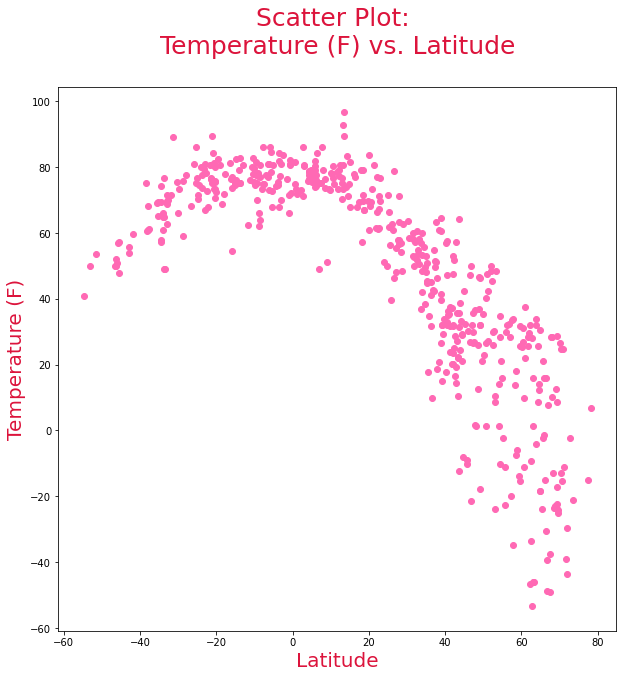

Note: This scatter plot is analyzing the relation between temperature (F) and latitude.


In [10]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Temperature (F)'], c = 'hotpink')
plt.xlabel('Latitude', fontsize = 20, c = 'crimson')
plt.ylabel('Temperature (F)', fontsize = 20, c = 'crimson')
plt.title('Scatter Plot: \n Temperature (F) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/01_scatter_plot_temp_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This scatter plot is analyzing the relation between temperature (F) and latitude.')

## Humidity (%) vs. Latitude Scatter Plot

Date & Time: 23-03-2021 16:23:26


<Figure size 432x288 with 0 Axes>

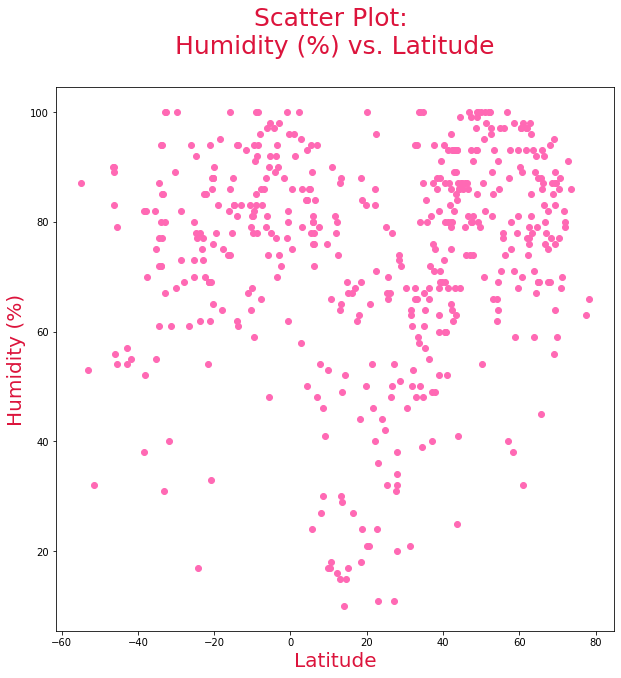

Note: This scatter plot is analyzing the relation between humidity (%) and latitude.


In [11]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Humidity (%)'], c = 'hotpink')
plt.xlabel('Latitude', fontsize = 20, c = 'crimson')
plt.ylabel('Humidity (%)', fontsize = 20, c = 'crimson')
plt.title('Scatter Plot: \n Humidity (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/02_scatter_plot_humid_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This scatter plot is analyzing the relation between humidity (%) and latitude.')

## Cloudiness (%) vs. Latitude Scatter Plot

Date & Time: 23-03-2021 16:23:26


<Figure size 432x288 with 0 Axes>

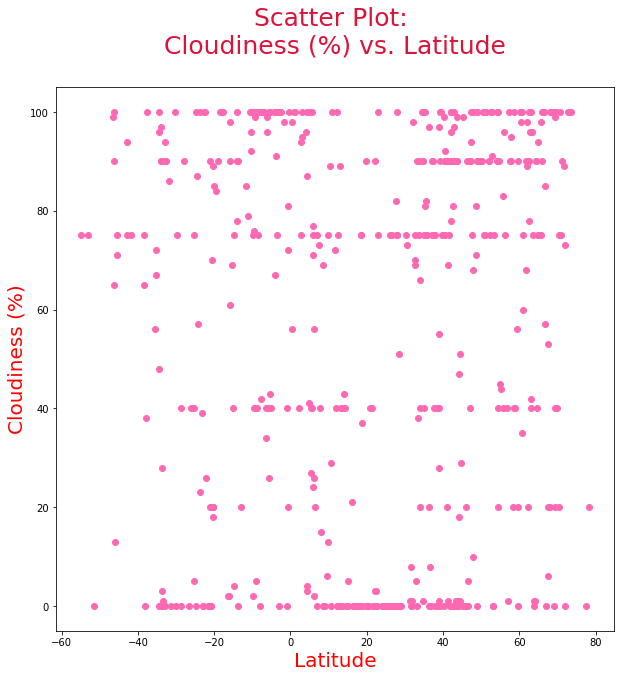

Note: This scatter plot is analyzing the relation between cloudiness (%) and latitude.


In [12]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Cloudiness (%)'], c = 'hotpink')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Cloudiness (%)', fontsize = 20, c = 'r')
plt.title('Scatter Plot: \n Cloudiness (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/03_scatter_plot_cloud_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This scatter plot is analyzing the relation between cloudiness (%) and latitude.')

## Wind Speed (mph) vs. Latitude Scatter Plot

Date & Time: 23-03-2021 16:23:26


<Figure size 432x288 with 0 Axes>

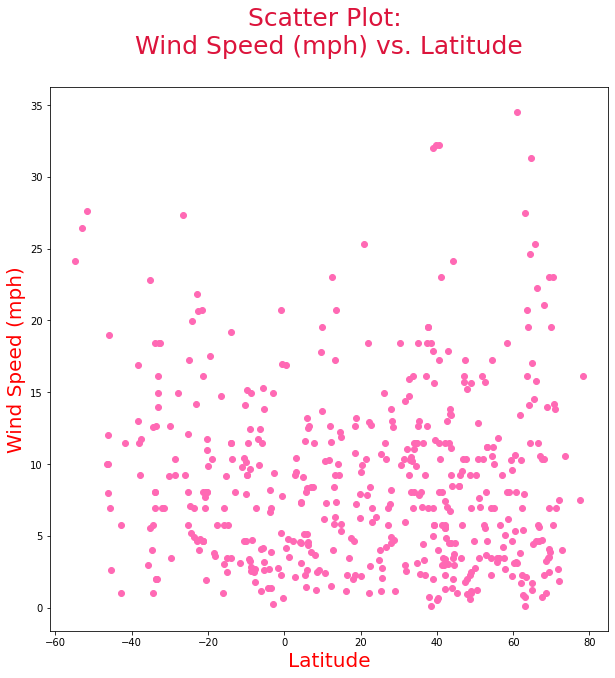

Note: This scatter plot is analyzing the relation between wind speed (mph) and latitude.


In [13]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data['Latitude'], cities_data['Wind Speed (mph)'], c = 'hotpink')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Wind Speed (mph)', fontsize = 20, c = 'r')
plt.title('Scatter Plot: \n Wind Speed (mph) vs. Latitude \n', fontsize = 25, c = 'crimson')
plt.savefig(pro_dir + 'output_images/04_scatter_plot_windspeed_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This scatter plot is analyzing the relation between wind speed (mph) and latitude.')

## Linear Regression:
###  Northern Hemisphere - Temperature (F) vs. Latitude

Regression: 0.7258937687767935
Date & Time: 23-03-2021 16:23:26


<Figure size 432x288 with 0 Axes>

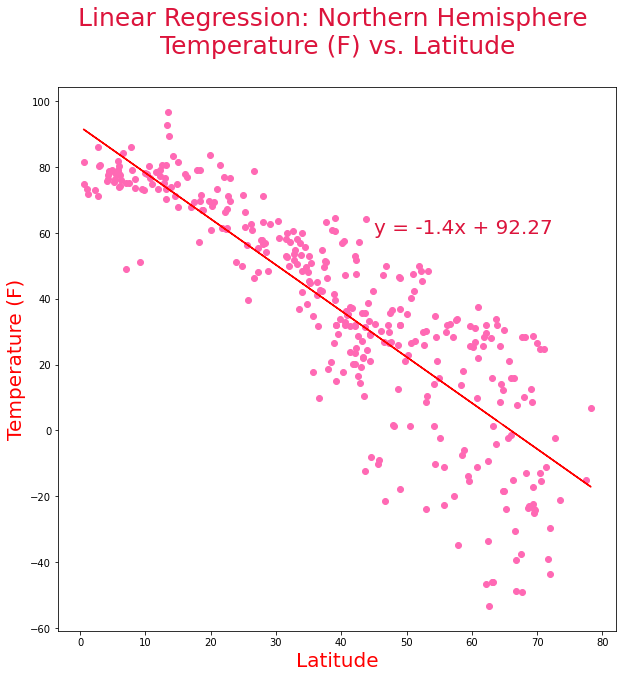

Note: This linear regression is showing the exponential relation between temperature (F) and latitude in Northern Hemisphere.


In [14]:
# Separating cities for Northen and Southern Hemisphere
cities_data_n_hem = cities_data[cities_data.Latitude >= 0]
cities_data_s_hem = cities_data[cities_data.Latitude < 0]

#print(cities_data_n_hem.shape,cities_data_s_hem.shape)
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Temperature (F)'], c = 'hotpink')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Temperature (F)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Temperature (F) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Temperature (F)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (45, 60), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/05_regression_northern_temp_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between temperature (F) and latitude in Northern Hemisphere.')

## Linear Regression:
###  Southern Hemisphere - Temperature (F) vs. Latitude

Regression: 0.4352988394727746
Date & Time: 23-03-2021 16:23:26


<Figure size 432x288 with 0 Axes>

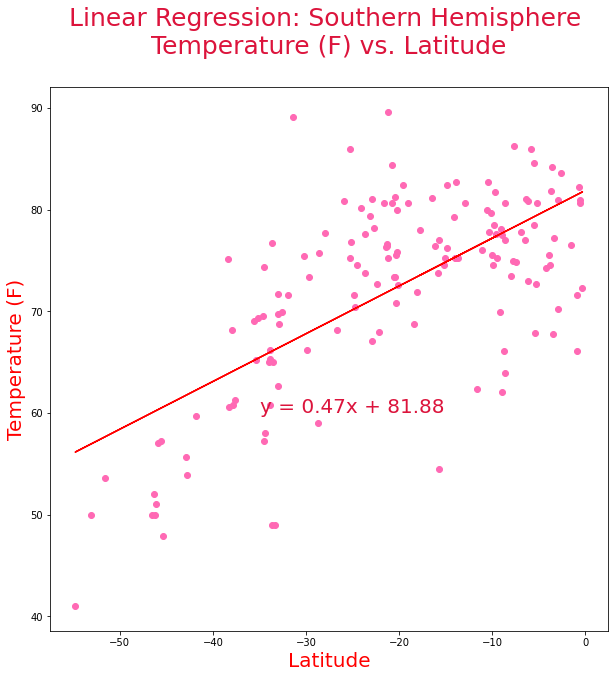

Note: This linear regression is showing the exponential relation between temperature (F) and latitude in Southern Hemisphere.


In [15]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Temperature (F)'], c = 'hotpink')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Temperature (F)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Temperature (F) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Temperature (F)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-35, 60), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/06_regression_southern_temp_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between temperature (F) and latitude in Southern Hemisphere.')

## LINEAR REGRESSION:
###  Northern Hemisphere - Humidity (%) vs. Latitude

Regression: 0.11774321600788373
Date & Time: 23-03-2021 16:23:26


<Figure size 432x288 with 0 Axes>

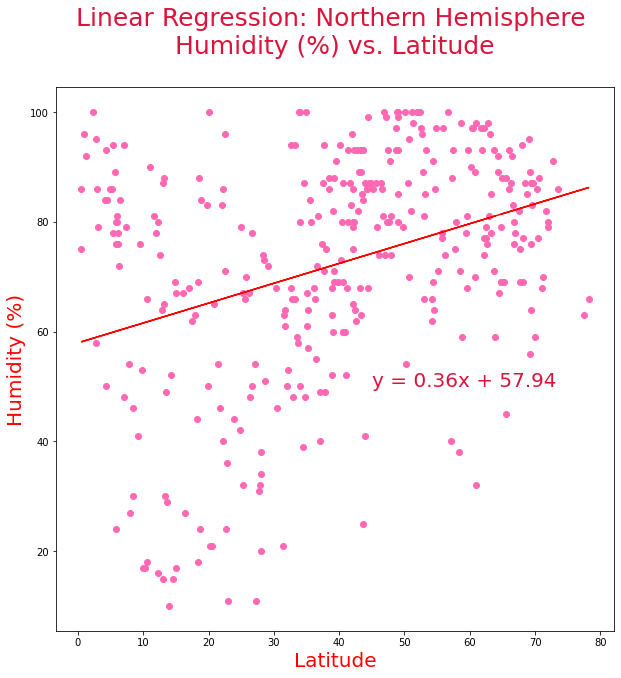

Note: This linear regression is showing the exponential relation between humidity (%) and latitude in Northern Hemisphere.


In [16]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Humidity (%)'], c = 'hotpink')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Humidity (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Humidity (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Humidity (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (45, 50), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/07_regression_northern_humid_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between humidity (%) and latitude in Northern Hemisphere.')

## Linear Regression:
###  Southern Hemisphere - Humidity (%) vs. Latitude

Regression: 0.10716670325450049
Date & Time: 23-03-2021 16:23:26


<Figure size 432x288 with 0 Axes>

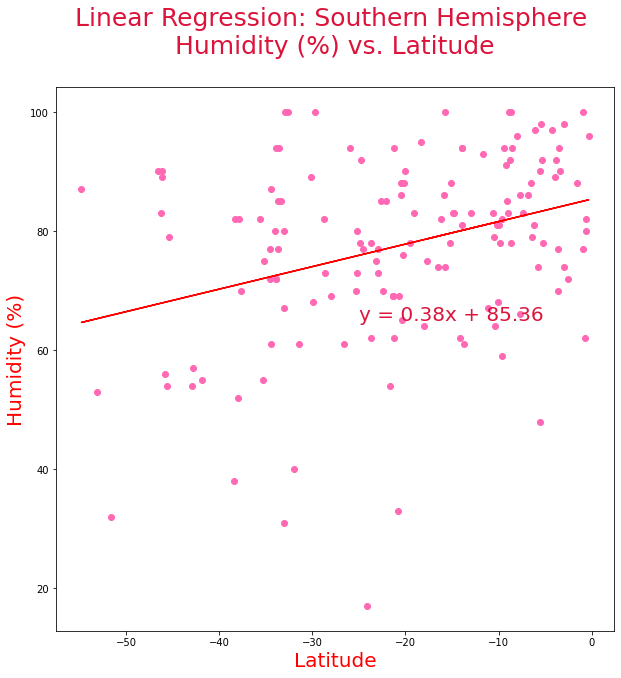

Note: This linear regression is showing the exponential relation between humidity (%) and latitude in Southern Hemisphere.


In [17]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Humidity (%)'], c = 'hotpink')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Humidity (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Humidity (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Humidity (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-25, 65), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/08_regression_southern_humid_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between humidity (%) and latitude in Southern Hemisphere.')

## Linear Regression:
###  Northern Hemisphere - Cloudiness (%) vs. Latitude

Regression: 0.06603781243620786
Date & Time: 23-03-2021 16:23:26


<Figure size 432x288 with 0 Axes>

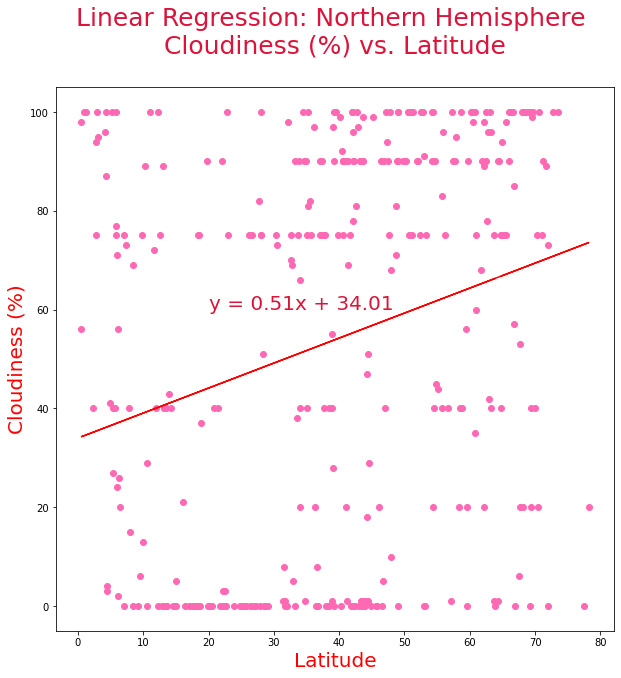

Note: This linear regression is showing the exponential relation between cloudiness (%) and latitude in Northern Hemisphere.


In [18]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Cloudiness (%)'], c = 'hotpink')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Cloudiness (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Cloudiness (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Cloudiness (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (20, 60), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/09_regression_northern_cloud_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between cloudiness (%) and latitude in Northern Hemisphere.')

## Linear Regression:
###  Southern Hemisphere - Cloudiness (%) vs. Latitude

Regression: 0.01732643481122636
Date & Time: 23-03-2021 16:23:26


<Figure size 432x288 with 0 Axes>

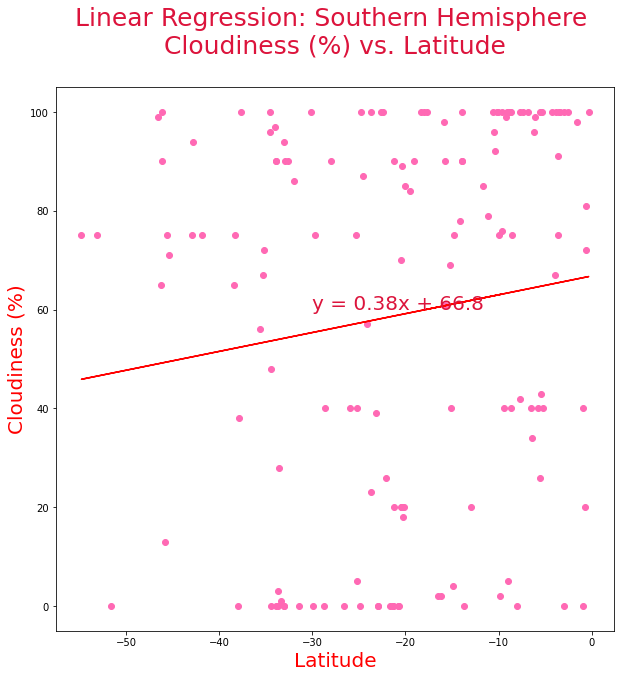

Note: This linear regression is showing the exponential relation between cloudiness (%) and latitude in Southern Hemisphere.


In [19]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Cloudiness (%)'], c = 'hotpink')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Cloudiness (%)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Cloudiness (%) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Cloudiness (%)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-30, 60), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/10_regression_southern_cloud_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between cloudiness (%) and latitude in Southern Hemisphere.')

## Linear Regression:
###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression: 0.004072164418064373
Date & Time: 23-03-2021 16:23:26


<Figure size 432x288 with 0 Axes>

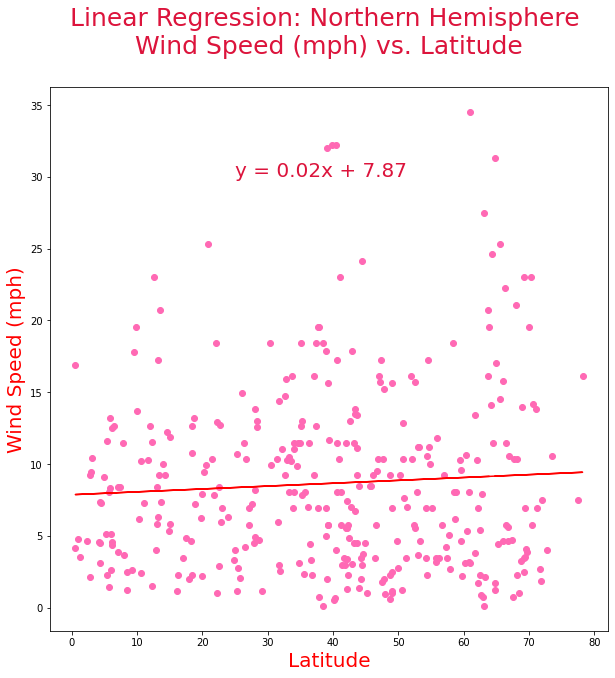

Note: This linear regression is showing the exponential relation between wind speed (mph) and latitude in Northern Hemisphere.


In [20]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_n_hem['Latitude'], cities_data_n_hem['Wind Speed (mph)'], c = 'hotpink')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Wind Speed (mph)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Northern Hemisphere \n Wind Speed (mph) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_n_hem['Latitude'], cities_data_n_hem['Wind Speed (mph)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_n_hem['Latitude'], slope * cities_data_n_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (25, 30), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/11_regression_northern_windspeed_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between wind speed (mph) and latitude in Northern Hemisphere.')

## Linear Regression:
###  Southern Hemisphere - Wind Speed (mph) vs. Latitude

Regression: 0.09384741991142094
Date & Time: 23-03-2021 16:23:26


<Figure size 432x288 with 0 Axes>

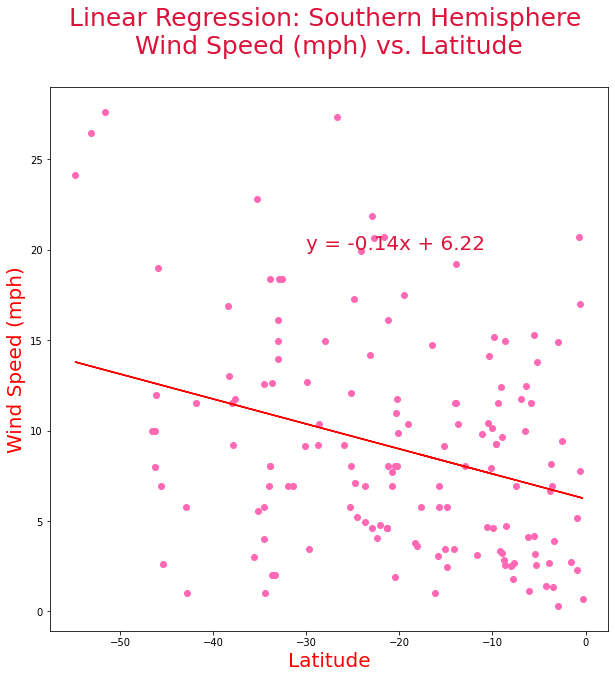

Note: This linear regression is showing the exponential relation between wind speed (mph) and latitude in Southern Hemisphere.


In [21]:
plt.figure()
plt.figure(figsize = (10, 10))
plt.scatter(cities_data_s_hem['Latitude'], cities_data_s_hem['Wind Speed (mph)'], c = 'hotpink')
plt.xlabel('Latitude', fontsize = 20, c = 'r')
plt.ylabel('Wind Speed (mph)', fontsize = 20, c = 'r')
plt.title('Linear Regression: Southern Hemisphere \n Wind Speed (mph) vs. Latitude \n', fontsize = 25, c = 'crimson')
slope, intercept, reg_value, p_value, std_err = st.linregress(cities_data_s_hem['Latitude'], cities_data_s_hem['Wind Speed (mph)'])
print('Regression:', reg_value ** 2)
plt.plot(cities_data_s_hem['Latitude'], slope * cities_data_s_hem['Latitude'] + intercept, color = 'red')
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.annotate(line_eq, (-30, 20), fontsize = 20, color = "crimson")
plt.savefig(pro_dir + 'output_images/12_regression_southern_windspeed_vs_lat.png')
print(f'Date & Time: ' + (datetime.fromtimestamp(data['dt']).strftime("%d-%m-%Y %H:%M:%S")))
plt.show()
print('Note: This linear regression is showing the exponential relation between wind speed (mph) and latitude in Southern Hemisphere.')